In [1]:
import pandas as pd
import numpy as np
import os

from scipy import stats

In [2]:
cwd = os.getcwd()

# data_path = "F:\\Academic\\Research\\myData\\processed_dataset"

data_path = "D:\\Research\\data\\processed_dataset" #lab

# tissue_type = 'liver'
# tissue_type = 'pancreas'
# tissue_type = 'kidney'
# tissue_type = 'heart'
tissue_type = 'brain_myeloid'

df_mRNA = pd.read_csv(f'{data_path}\\{tissue_type}\\mRNA_bulk.csv')
df_mRNA = df_mRNA.drop('Unnamed: 0',axis=1)

df_miRNA = pd.read_csv(f'{data_path}\\{tissue_type}\\miRNA_bulk.csv')
df_miRNA = df_miRNA.drop('Unnamed: 0',axis=1)

df_miRNA

,gene_name,O5.MAA000570.3_8_M.1.1,C3.MAA000570.3_8_M.1.1,F17.MAA000570.3_8_M.1.1,I17.MAA000570.3_8_M.1.1,K17.MAA000570.3_8_M.1.1,M12.MAA000570.3_8_M.1.1,P16.MAA000570.3_8_M.1.1,C4.MAA000570.3_8_M.1.1,F21.MAA000570.3_8_M.1.1,...,D18.B001176.3_56_F.1.1,F1.B001176.3_56_F.1.1,G8.B001176.3_56_F.1.1,H16.B001176.3_56_F.1.1,I18.B001176.3_56_F.1.1,K1.B001176.3_56_F.1.1,L7.B001176.3_56_F.1.1,M20.B001176.3_56_F.1.1,O3.B001176.3_56_F.1.1,P10.B001176.3_56_F.1.1
0,Mir103-2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mir106b,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mir10a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Mir1191,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Mir1192,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Mirlet7d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188,Mirlet7f-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
189,Mirlet7f-2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
190,Mirlet7g,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
temp_allgenes = df_mRNA.drop(df_mRNA.index[(df_mRNA.iloc[:,1:].sum(axis = 1) < 100)])
temp_allgenes = temp_allgenes.set_index('gene_name').T

temp_allgenes

gene_name,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610009B22Rik,0610009D07Rik,0610009L18Rik,0610009O20Rik,...,Zwilch,Zwint,Zxda,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,l7Rn6
O5.MAA000570.3_8_M.1.1,0,0,0,0,0,0,0,0,0,240,...,0,18,0,0,0,151,0,7,36,0
C3.MAA000570.3_8_M.1.1,0,348,0,0,686,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F17.MAA000570.3_8_M.1.1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
I17.MAA000570.3_8_M.1.1,0,0,0,0,13,206,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
K17.MAA000570.3_8_M.1.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K1.B001176.3_56_F.1.1,0,126,0,0,0,0,71,0,0,0,...,0,0,0,0,7,0,74,135,0,0
L7.B001176.3_56_F.1.1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,142,1,42,0,125,0
M20.B001176.3_56_F.1.1,0,42,0,0,0,0,0,26,0,19,...,0,0,0,0,0,0,0,0,0,0
O3.B001176.3_56_F.1.1,0,761,0,0,0,0,0,234,0,0,...,0,0,0,0,0,0,17,0,0,0


In [4]:
corr_tally = pd.DataFrame(columns=['tally'])

for col in temp_allgenes:
    corr_tally.loc[col] = [0]

In [5]:
temp_mir = df_miRNA.drop(df_miRNA.index[(df_miRNA.iloc[:,1:].sum(axis = 1) < 90)])
temp_mir = temp_mir.set_index('gene_name').T

# corr_df = pd.DataFrame()

all_corr = []


corr_thres = 0.3
# miCol = 3
# temp_mir.iloc[:,miCol]

for miCol in range(temp_mir.shape[1]):
    for col in temp_allgenes:
        r, p = stats.pearsonr(temp_mir.iloc[:,miCol], temp_allgenes[col])
        
        all_corr.append(r)

        if(r>corr_thres):
            corr_tally.loc[col] = corr_tally.loc[col] + 1

        # corr_df.iloc[col, miCol] = round(r, 3)

# corr_df[(corr_df.r>0.3)]

In [6]:
high_corr_genes = corr_tally.sort_values('tally', ascending=False)[0:2500]

In [7]:
# r, p = stats.pearsonr(temp_mir126, temp_allgenes.iloc[:,1])


corr_tally[corr_tally.tally>0]


,tally
0610043K17Rik,1
1110021J02Rik,1
1110054M08Rik,1
1110054O05Rik,1
1110065P20Rik,1
...,...
Zfp790,1
Zfp799,1
Zranb3,1
Zrsr2,1


In [8]:
high_corr_genes.sort_index().index

Index(['0610005C13Rik', '0610043K17Rik', '1110021J02Rik', '1110054M08Rik',
       '1110054O05Rik', '1110065P20Rik', '1200011M11Rik', '1300002K09Rik',
       '1500015O10Rik', '1600020E01Rik',
       ...
       'Zfp667', 'Zfp668', 'Zfp709', 'Zfp740', 'Zfp764', 'Zfp790', 'Zfp799',
       'Zranb3', 'Zrsr2', 'Zswim5'],
      dtype='object', length=2500)

In [9]:
final_mRNA_gene_dataset = temp_allgenes[high_corr_genes.sort_index().index]
final_mRNA_gene_dataset.to_csv(f'{data_path}\\{tissue_type}\\highly_expressed_2500_genes.csv')



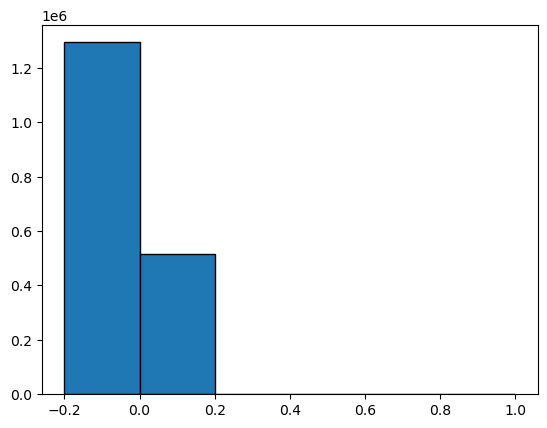

In [10]:
# temp_mir126 = df_miRNA.set_index('gene_name').T
# temp_mir126 = temp_mir126.Mir126



all_corr


import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
import pandas as pd


bins= [-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]
plt.hist(all_corr, bins=bins, edgecolor="k")
plt.xticks(bins)

plt.show()

In [11]:
# corr_df = pd.DataFrame(columns=['r', 'p'])

# for col in temp_allgenes:
#     r, p = stats.pearsonr(temp_mir126, temp_allgenes[col])
#     corr_df.loc[col] = [round(r, 3), round(p, 3)]

In [12]:
high_corr_genes

,tally
Snora61,3
Tnni3,3
Lrig1,3
Fos,3
Nptxr,3
...,...
Mki67ip,0
Mkks,0
Mkl1,0
Mmab,0


In [13]:
# corr_df[(corr_df.p>0.3)]